## Astronomical Coordinates 1: Getting Started with astropy.coordinates

Here I am following the tutorial for dealing with astronomical coordinates from the site [Learn Astropy](https://learn.astropy.org/rst-tutorials/1-Coordinates-Intro.html?highlight=filtertutorials).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u
from astropy.coordinates import SkyCoord, Distance
from astropy.io import fits
from astropy.table import QTable
from astropy.utils.data import download_file

The tutorial indicates that the object SkyCoord() accepts ra (right ascension) and dec (declination values) in three different ways, which are illustrated below by locating the position of the  open star cluster NGC 188. Note the usage of the [*International Celestial Reference System*](https://en.wikipedia.org/wiki/International_Celestial_Reference_System_and_Frame).

In [2]:
# specificating the units through objets alongside the values
ngc188_center = SkyCoord(12.11*u.deg, 85.26*u.deg, frame='icrs')
ngc188_center

<SkyCoord (ICRS): (ra, dec) in deg
    (12.11, 85.26)>

Through strings on which the units are in hour-minute-seconds notation or degree-minute-seconds notation

In [3]:
SkyCoord('00h48m26.4s', '85d15m36s', frame='icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    (12.11, 85.26)>

Or by using the option unit to locate the object, as below: 

In [4]:
SkyCoord('00:48:26.4 85:15:36',unit=(u.hour,u.deg))

<SkyCoord (ICRS): (ra, dec) in deg
    (12.11, 85.26)>

Note that the three options presented above resulted in the same values for the positions for the star cluster NGC188. We just avoided atributing the objects to reduce typing.

In [5]:
ngc188_center.ra, ngc188_center.dec

(<Longitude 12.11 deg>, <Latitude 85.26 deg>)

In [6]:
ngc188_center.ra

<Longitude 12.11 deg>

In [7]:
type(ngc188_center.ra)

astropy.coordinates.angles.Longitude

Conversion of units in two ways, a method and a property of the `Angle` object.

In [8]:
print(ngc188_center.ra.to(u.hourangle), 
      ngc188_center.ra.to(u.radian),
      ngc188_center.ra.to(u.degree)
     )

0h48m26.4s 0.211359rad 12d06m36s


In [9]:
print(ngc188_center.ra.hour,
      ngc188_center.ra.radian,
      ngc188_center.ra.degree
     )

0.8073333333333335 0.21135937241651329 12.11


Working with data from Gaia, an European Space Agency mission that is expected to map 1% of our Galaxy stars!

In [10]:
from astroquery.gaia import Gaia
Gaia.ROW_LIMIT = 10000

In [11]:
job = Gaia.cone_search_async(ngc188_center, radius=0.5*u.deg)
ngc188_table = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


In [12]:
len(ngc188_table)

10000

In [13]:
ngc188_view = ngc188_table[ ngc188_table['phot_g_mean_mag'] < 19*u.mag ]

In [14]:
ngc188_gaia_coords = SkyCoord(ngc188_view['ra'],ngc188_view['dec'])

In [15]:
ngc188_gaia_coords

<SkyCoord (ICRS): (ra, dec) in deg
    [(12.12843989, 85.26076889), (12.09381253, 85.26522648),
     (12.09832966, 85.25443128), ..., (16.0553526 , 85.64251242),
     (16.05884572, 85.6423048 ), (13.05668027, 84.7728428 )]>

Trying to catch stars near Aldebaran

In [16]:
ngc188_center = SkyCoord.from_name('NGC 188')

In [17]:
star = SkyCoord.from_name('Aldebaran')

In [18]:
star.separation(ngc188_center)

<Angle 70.94100133 deg>

In [19]:
ngc188_gaia_coords.separation(star)

<Angle [70.94263407, 70.94741531, 70.94140437, ..., 70.89706922,
        70.89673247, 70.61399873] deg>

In [20]:
x = ngc188_gaia_coords.ra.degree
y = ngc188_gaia_coords.dec.degree

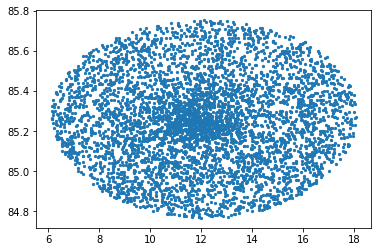

In [21]:
plt.scatter(x,y,s=5)

# More than just Sky Positions: Distance

SkyCoord has an argument called distance, which means that.

In [33]:
mask = (ngc188_view['parallax'] / ngc188_view['parallax_error']) > 10
ngc188_table_3d = ngc188_view[ mask ]

In [34]:
parallax = np.asarray(ngc188_table_3d['parallax'])*u.mas

In [35]:
gaia_dist = Distance(parallax = parallax)

In [39]:
ngc188_coords_3d = SkyCoord(ra=ngc188_table_3d['ra'],
                            dec=ngc188_table_3d['dec'],
                            distance=gaia_dist)

In [42]:
ra = ngc188_coords_3d.ra.degree
dec = ngc188_coords_3d.dec.degree
distance = ngc188_coords_3d.distance.kpc

Text(0.5, 1.0, 'Fontes DR2 Gaia próximos de NGC 188')

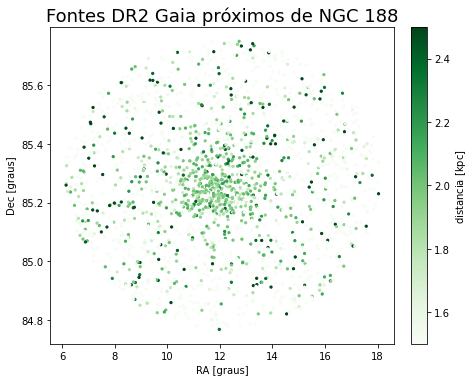

In [51]:
fig, ax = plt.subplots(figsize=(6.5, 5.2),
                       constrained_layout=True)
cs = ax.scatter(ra, dec, c=distance, s=5, vmin=1.5, vmax=2.5, cmap='Greens')
cb = fig.colorbar(cs)
cb.set_label(f'distancia [{u.kpc:latex_inline}]')

ax.set_xlabel('RA [graus]')
ax.set_ylabel('Dec [graus]')

ax.set_title('Fontes DR2 Gaia próximos de NGC 188', fontsize=18)
